<a href="https://colab.research.google.com/github/circuit-geek/Summer-Internship-2021/blob/main/Logistic_Regression_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Neural Networks with Logistic Regression and working with MNIST Dataset**

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

Here we have imported all the required libraries, in addition to torch we import torchvision which is used for handling data that includes images.

In [2]:
dataset = MNIST(root= 'data/', download=True) #downloading the training dataset

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
len(dataset)

60000

This show the training dataset has about 60000 images which can be used for training the model, next we initialize the test set with changing the parameter of train to be false. 

In [4]:
test_dataset = MNIST(root= 'data/', train=False) #initialzing the test dataset

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FCE20AB2550>, 5)

The output here shows that the image is an object of class PIL.Image.Image which itself comes from a Python Library called Pillow, it is library used for imaging, we can see the image using Matplotlib.

In [6]:
import matplotlib.pyplot as plt

Label: 5


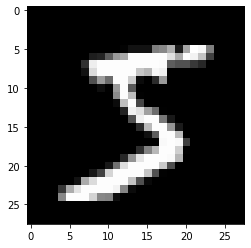

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


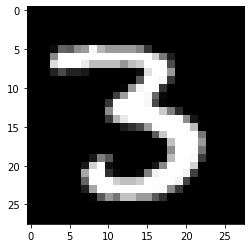

In [8]:
image, label = dataset[12]
plt.imshow(image, cmap='gray')
print('Label:', label)

Now that images are displayed, Pytorch can only work with tensors and not plain images, so we have transform the images to tensors using a pytorch library from torchvision.

In [9]:
import torchvision.transforms as transforms

In [10]:
dataset = MNIST(root= 'data/', train=True, transform=transforms.ToTensor())

In [11]:
img_tensor, label = dataset[0]
print(img_tensor.shape)
print('Label:', label)

torch.Size([1, 28, 28])
Label: 5


In [12]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor))
print(torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.)
tensor(0.)


So from the above we can understand the img_tensor has converted the image to equivalent tensor value and the maximum tensor value being 1 and the minimum being 0. The Value 1 corresponds to white and 0 corresponds to black. We can represent this as a graph to using Matplotlib.

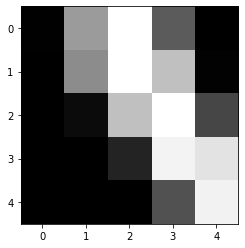

In [13]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

So now we can start training the model, so now we have to separate the whole dataset into training, validation and test set, here we 60000 images for training so we separate this to 50000 and 10000 for training and validation set.

In [14]:
from torch.utils.data import random_split

train_ds, valid_ds = random_split(dataset, [50000,10000])
print(len(train_ds))
print(len(valid_ds))

50000
10000


MNIST data is sorted according to the numbers starting from 0's, 1's and so on, so only choosing the last 10000 images from the dataset would result in the values of 8's and 9's in validation set, and training set won't contain those values, so we can use dataloader to overcome this.

In [15]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
valid_loader = DataLoader(valid_ds, batch_size)

Like linear regression, even logistic regression is also very similar where we do matrix multiplication with transposed matrix of weights which is later summed up with the bias. Since now nn.Linear which we will be using expects a vector value, now the image we have is 1*28*28, which is converted to vector by multiplying 28*28 to value of 784, this represents the pixel values now of the image. 

In [16]:
import torch.nn as nn

In [17]:
input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes) #logistic regression model

In [18]:
print(model.weight.shape)
print(model.weight)

torch.Size([10, 784])
Parameter containing:
tensor([[ 0.0293, -0.0200, -0.0231,  ..., -0.0302,  0.0012,  0.0003],
        [-0.0135, -0.0054,  0.0348,  ...,  0.0026,  0.0045, -0.0352],
        [-0.0131,  0.0262, -0.0091,  ...,  0.0277, -0.0132, -0.0242],
        ...,
        [-0.0072, -0.0262,  0.0119,  ..., -0.0006, -0.0128, -0.0298],
        [-0.0350, -0.0278, -0.0115,  ..., -0.0278,  0.0252,  0.0208],
        [ 0.0130,  0.0300,  0.0091,  ..., -0.0253,  0.0034,  0.0238]],
       requires_grad=True)


In [19]:
print(model.bias.shape)
print(model.bias)

torch.Size([10])
Parameter containing:
tensor([-0.0093,  0.0117,  0.0060,  0.0143, -0.0034, -0.0215,  0.0059,  0.0006,
        -0.0245,  0.0343], requires_grad=True)


In [21]:
for images,labels in train_loader:
  print(labels)
  print(images.shape)
  outputs = model(images)
  break

tensor([8, 2, 8, 4, 0, 1, 4, 8, 1, 5, 5, 4, 5, 3, 0, 7, 4, 6, 5, 7, 1, 5, 0, 2,
        3, 1, 8, 4, 9, 4, 4, 9, 8, 2, 2, 3, 8, 7, 0, 2, 0, 5, 6, 3, 9, 9, 4, 7,
        8, 3, 0, 9, 5, 9, 1, 1, 5, 2, 4, 8, 9, 5, 5, 0, 2, 1, 1, 7, 5, 9, 5, 2,
        2, 2, 5, 2, 4, 5, 0, 2, 2, 0, 5, 9, 1, 4, 4, 3, 8, 2, 1, 8, 2, 2, 7, 0,
        3, 0, 7, 8, 1, 4, 6, 6, 1, 1, 8, 2, 6, 4, 4, 8, 5, 4, 9, 2, 6, 7, 5, 6,
        2, 4, 5, 7, 4, 9, 5, 9])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

Here nn.Linear expects 2 dimensional input where it is (128,1,28,28) where the 128 represents the batch size, so in order to change the shape we can use the reshape method and make it vector of 784.

In [22]:
print(images.shape)

torch.Size([128, 1, 28, 28])


In [24]:
new_size = images.reshape(128,784)
print(new_size.shape)

torch.Size([128, 784])


To include add functionalities to our model, we need to define a custom model by extending the nn.module class from PyTorch.

In [26]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1,784)
    out = self.linear(xb)
    return out

model = MnistModel()      

In [27]:
print(model.linear)

Linear(in_features=784, out_features=10, bias=True)


In [28]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0203, -0.0002,  0.0248,  ..., -0.0109,  0.0249, -0.0288],
        [-0.0156,  0.0310, -0.0272,  ..., -0.0103,  0.0244,  0.0116],
        [-0.0140,  0.0305, -0.0078,  ..., -0.0124,  0.0072,  0.0253],
        ...,
        [-0.0262, -0.0054, -0.0058,  ...,  0.0018,  0.0243, -0.0060],
        [-0.0239,  0.0083, -0.0070,  ...,  0.0045, -0.0079,  0.0251],
        [-0.0257,  0.0130,  0.0130,  ..., -0.0229, -0.0071, -0.0282]],
       requires_grad=True), Parameter containing:
tensor([ 0.0092,  0.0355,  0.0066,  0.0114, -0.0200,  0.0326, -0.0314, -0.0340,
        -0.0307,  0.0138], requires_grad=True)]


In [29]:
for images, labels in train_loader:
  print(images.shape)
  output = model(images)
  break

print('output shape:', output.shape)
print('sample output:', output[0:3].data)

torch.Size([128, 1, 28, 28])
output shape: torch.Size([128, 10])
sample output: tensor([[-0.2723,  0.2463,  0.2277,  0.0554, -0.0317,  0.1074, -0.2576, -0.3348,
          0.0457, -0.0866],
        [ 0.0027,  0.3001,  0.2712,  0.2328, -0.2376,  0.3067, -0.1587, -0.1196,
          0.2610, -0.1219],
        [-0.0518,  0.1064,  0.0187,  0.0072, -0.2142, -0.0803, -0.1306, -0.1977,
         -0.0957, -0.1525]])


Now from the sample output we can see the probablities defined by the model, now certain values in the output seem to be negative which aren't possible so we have to convert these values between 0 to 1 and the sum of all their values must be equal to 1. We can use Softmax function for this purpose.

In [30]:
import torch.nn.functional as F

In [31]:
probs = F.softmax(output, dim=1)
print('Sample probabilites:', probs[0:2].data)
print('Sum:', torch.sum(probs[0]).item())

Sample probabilites: tensor([[0.0770, 0.1294, 0.1270, 0.1069, 0.0980, 0.1126, 0.0782, 0.0724, 0.1059,
         0.0927],
        [0.0912, 0.1228, 0.1193, 0.1148, 0.0717, 0.1236, 0.0776, 0.0807, 0.1180,
         0.0805]])
Sum: 0.9999999403953552


In [33]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([1, 5, 1, 5, 2, 1, 1, 0, 1, 1, 2, 2, 1, 6, 2, 1, 1, 1, 0, 0, 5, 2, 6, 1,
        1, 1, 2, 1, 5, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 5, 1, 1, 2, 1, 2, 2,
        1, 1, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 5, 3, 1, 2, 2, 1, 1, 2, 1, 0, 1, 2,
        1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 0, 6, 1, 1, 3, 1, 1, 1, 1,
        2, 1, 0, 1, 2, 1, 2, 1, 1, 2, 1, 2, 6, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        5, 2, 1, 1, 2, 1, 2, 1])
tensor([0.1294, 0.1236, 0.1198, 0.1196, 0.1377, 0.1455, 0.1334, 0.1300, 0.1541,
        0.1293, 0.1329, 0.1251, 0.1469, 0.1357, 0.1335, 0.1386, 0.1456, 0.1335,
        0.1219, 0.1234, 0.1409, 0.1429, 0.1184, 0.1518, 0.1357, 0.1361, 0.1261,
        0.1404, 0.1403, 0.1329, 0.1133, 0.1355, 0.1472, 0.1513, 0.1549, 0.1266,
        0.1355, 0.1395, 0.1205, 0.1379, 0.1488, 0.1257, 0.1197, 0.1656, 0.1385,
        0.1323, 0.1413, 0.1391, 0.1426, 0.1501, 0.1242, 0.1651, 0.1442, 0.1762,
        0.1207, 0.1230, 0.1231, 0.1662, 0.1363, 0.1872, 0.1356, 0.1250, 0.1304,
       

In [34]:
print(labels)

tensor([3, 1, 2, 6, 2, 8, 1, 3, 1, 0, 9, 0, 5, 7, 6, 8, 4, 1, 5, 0, 8, 6, 9, 8,
        3, 7, 8, 2, 2, 9, 5, 9, 2, 3, 8, 7, 3, 1, 8, 7, 1, 1, 8, 8, 3, 7, 6, 2,
        7, 5, 9, 2, 9, 0, 7, 4, 4, 2, 3, 0, 9, 2, 6, 2, 0, 9, 3, 7, 3, 4, 6, 6,
        8, 8, 7, 9, 6, 9, 8, 4, 9, 4, 7, 0, 2, 1, 1, 0, 9, 4, 0, 7, 1, 0, 7, 8,
        6, 2, 0, 2, 7, 0, 3, 5, 8, 5, 3, 6, 7, 2, 3, 9, 7, 1, 1, 9, 1, 0, 9, 6,
        1, 6, 7, 5, 8, 7, 3, 0])


In [35]:
def accuracy(output, labels):
  _,preds = torch.max(output, dim=1)
  return torch.tensor(torch.sum(preds == labels).item()/len(preds))

In [36]:
accuracy(output, labels)

tensor(0.1562)

Here now we use cross entropy as loss function as the evaluation metric for this model, cross entropy does softmax internally so we just need to provide the tensor value output, the output which is resulted by cross entropy function is multiplied with -1, which gives a large positive result.

In [37]:
loss_fn = F.cross_entropy

loss = loss_fn(output, labels)
print(loss)

tensor(2.3198, grad_fn=<NllLossBackward>)


Now we begin training the model, this time also along with validation set, same steps as in that of the linear regression.

In [52]:
def fit(epochs, lr, model, train_loader, valid_loader, opt_func=torch.optim.SGD):
  optimizer = opt_func(model.parameters(), lr)
  history = [] 

  for epoch in range(epochs):
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    result = evaluate(model,valid_loader)
    model.epoch_end(epoch, result)
    history.append(result)

  return history  

In [40]:
def evaluate(model, valid_loader):
  output = [model.validation_step(batch) for batch in valid_loader]
  return model.validation_epoch_end(output)

Now that we have defined our fit function, we have to complete our MnistModel class.

In [53]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self,xb):
    xb = xb.reshape(-1,784)
    out = self.linear(xb) 
    return out

  def training_step(self, batch):
    images,labels = batch
    out = self(images)  #find the predictions
    loss = F.cross_entropy(out, labels) #calculate the loss
    return loss

  def validation_step(self, batch):
    images, labels = batch
    out = self(images) #find the predictions
    loss = F.cross_entropy(out, labels)  #calculate the loss
    acc = accuracy(out, labels)  #calculate the accuracy
    return {'val_loss' : loss, 'val_acc': acc}

  def validation_epoch_end(self, output):
    batch_losses = [x['val_loss'] for x in output]
    epoch_loss = torch.stack(batch_losses).mean()
    batch_accs = [x['val_acc'] for x in output]
    epoch_acc = torch.stack(batch_accs).mean()
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

  def epoch_end(self, epoch, result):
    print("epoch[{}], val_loss: {:.3f}, val_acc: {:.3f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

First let us look at the performance of the model for randomaly initialized weight and bias on validation set and their metrics.

In [46]:
result1 = evaluate(model, valid_loader)
print(result1)

{'val_loss': 2.2903006076812744, 'val_acc': 0.1481408178806305}


In [54]:
history1 = fit(5, 0.001, model, train_loader, valid_loader)

epoch[0], val_loss: 1.967, val_acc: 0.569
epoch[1], val_loss: 1.694, val_acc: 0.719
epoch[2], val_loss: 1.490, val_acc: 0.762
epoch[3], val_loss: 1.336, val_acc: 0.784
epoch[4], val_loss: 1.217, val_acc: 0.796


In [55]:
history2 = fit(5,0.001, model, train_loader, valid_loader)

epoch[0], val_loss: 1.124, val_acc: 0.805
epoch[1], val_loss: 1.050, val_acc: 0.812
epoch[2], val_loss: 0.989, val_acc: 0.818
epoch[3], val_loss: 0.938, val_acc: 0.822
epoch[4], val_loss: 0.895, val_acc: 0.826


In [56]:
history3 = fit(5,0.001, model, train_loader, valid_loader)

epoch[0], val_loss: 0.859, val_acc: 0.830
epoch[1], val_loss: 0.827, val_acc: 0.834
epoch[2], val_loss: 0.799, val_acc: 0.838
epoch[3], val_loss: 0.775, val_acc: 0.840
epoch[4], val_loss: 0.753, val_acc: 0.842


In [57]:
history4 = fit(5,0.001, model, train_loader, valid_loader)

epoch[0], val_loss: 0.734, val_acc: 0.844
epoch[1], val_loss: 0.716, val_acc: 0.846
epoch[2], val_loss: 0.700, val_acc: 0.847
epoch[3], val_loss: 0.685, val_acc: 0.848
epoch[4], val_loss: 0.672, val_acc: 0.850


In [58]:
history5 = fit(5,0.001, model, train_loader, valid_loader)

epoch[0], val_loss: 0.660, val_acc: 0.851
epoch[1], val_loss: 0.648, val_acc: 0.853
epoch[2], val_loss: 0.638, val_acc: 0.854
epoch[3], val_loss: 0.628, val_acc: 0.855
epoch[4], val_loss: 0.619, val_acc: 0.856


Now that we have learnt significantly around 25 epochs, the accuracy and loss could become better by tuning the values of epochs and learning rate, this is known as Hyperparameter Tuning. We can now visualize the graph of accuracy by plotting using matplotlib.

Text(0, 0.5, 'accuracy')

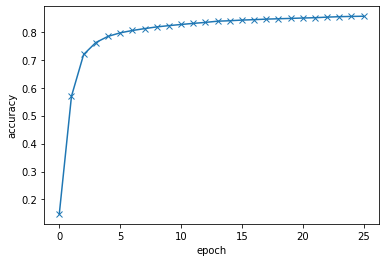

In [59]:
history = [result1] + history1 + history2 + history3 + history4 + history5
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')

Now let's try out with test images, and check how well our model works with test set.

In [60]:
test_dataset = MNIST(root='data/', train=False, transform=transforms.ToTensor())

Label: 7


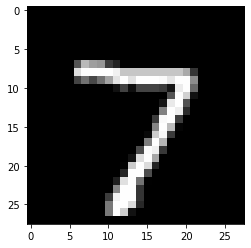

In [61]:
image, label = test_dataset[0]
plt.imshow(image[0], cmap='gray')
print('Label:', label)

Let's create a function of predicting the image from test set let's call the function predict_image. In the function we add a method called unsqueeze, the use of this method is to add a dimension at the beginning of the tensor, which the model views as a batch containing a single image.

In [62]:
def predict_image(image, model):
  xb = image.unsqueeze(0)
  yb = model(xb)
  _, preds = torch.max(yb, dim=1)
  return preds[0].item()

In [63]:
predict_image(image, model)

7

Label: 0 Predicted: 0


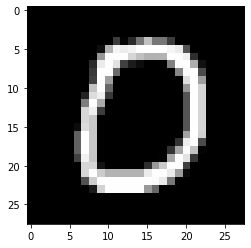

In [67]:
image, label = test_dataset[10]
plt.imshow(image[0], cmap='gray')
print('Label:', label, 'Predicted:', predict_image(image,model))

Label: 9 Predicted: 7


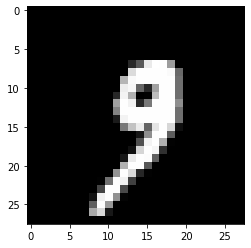

In [68]:
image, label = test_dataset[1000]
plt.imshow(image[0], cmap='gray')
print('Label:', label, 'Predicted:', predict_image(image,model))

Label: 9 Predicted: 9


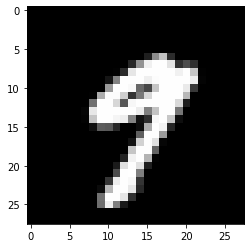

In [69]:
image, label = test_dataset[20]
plt.imshow(image[0], cmap='gray')
print('Label:', label, 'Predicted:', predict_image(image,model))